In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import astropy 
#from astropy import units as u
#from astropy import constants as const

%matplotlib inline 
#for jupyter notebook

In [2]:
overall_lenses = np.loadtxt("bins_cosmolike/zdistri_WFIRST_clustering_fine_bin.txt")
overall_sources = np.loadtxt("bins_cosmolike/zdistri_WFIRST_lensing_fine_bin.txt")

In [3]:
folder = "bins_cosmolike/pessim/"
pessim_lenses = np.loadtxt(folder+"WFIRST_area2.000000e+03_ng5.100000e+01_nl6.600000e+01_zdistr_lenses_Ncl20_Ntomo10.txt")
pessim_sources = np.loadtxt(folder+"WFIRST_area2.000000e+03_ng5.100000e+01_nl6.600000e+01_zdistr_sources_Ncl20_Ntomo10.txt")


In [4]:
folder = "bins_cosmolike/wide/"
wide_lenses = np.loadtxt(folder+"WFIRST_area1.800000e+04_ng4.300000e+01_nl5.000000e+01_zdistr_lenses_Ncl20_Ntomo10.txt")
wide_sources = np.loadtxt(folder+"WFIRST_area1.800000e+04_ng4.300000e+01_nl5.000000e+01_zdistr_sources_Ncl20_Ntomo10.txt")

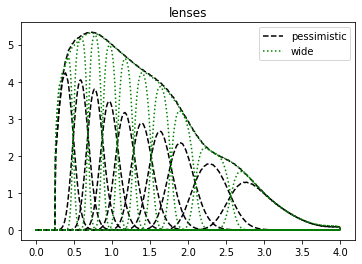

In [5]:

plt.plot(pessim_lenses[:,0],np.sum(pessim_lenses[:,1:], axis=1),"--", color="black", label="pessimistic")
plt.plot(wide_lenses[:,0],np.sum(wide_lenses[:,1:], axis=1),":", color="green", label="wide")
plt.plot(pessim_lenses[:,0], pessim_lenses[:,1:],"--", color="black", label=None)
plt.plot(wide_lenses[:,0], wide_lenses[:,1:],":", color="green", label=None)


plt.title("lenses")
    

plt.legend()

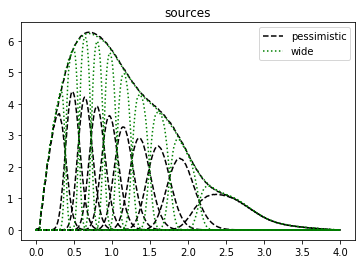

In [6]:

plt.plot(pessim_sources[:,0],np.sum(pessim_sources[:,1:], axis=1),"--", color="black", label="pessimistic")
plt.plot(wide_sources[:,0],np.sum(wide_sources[:,1:], axis=1),":", color="green", label="wide")
plt.plot(pessim_sources[:,0], pessim_sources[:,1:],"--", color="black", label=None)
plt.plot(wide_sources[:,0], wide_sources[:,1:],":", color="green", label=None)


plt.title("sources")
    

plt.legend()

In [7]:
##cosmosis implementation for comparison
folder = "bins_cosmosis/wide/"

cosmosis_wide_lenses = np.zeros((11, 300))
cosmosis_wide_lenses[0] = list(np.loadtxt(folder+"nz_lens/z.txt"))
for i in range(10):
    cosmosis_wide_lenses[i+1] = np.loadtxt(folder+"nz_lens/bin_"+str(i+1)+".txt")
cosmosis_wide_lenses = cosmosis_wide_lenses.T
    

In [8]:
cosmosis_wide_lenses#.shape

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01337793, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02675585, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.97324415, 0.        , 0.        , ..., 0.        , 0.        ,
        0.08148792],
       [3.98662207, 0.        , 0.        , ..., 0.        , 0.        ,
        0.07491937],
       [4.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06812536]])

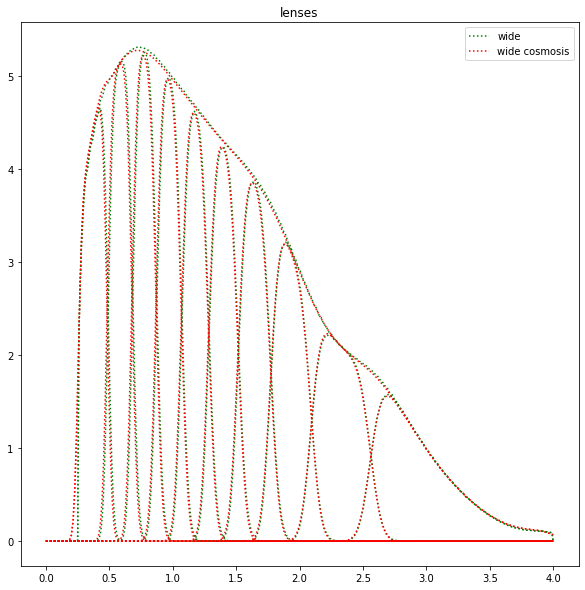

In [9]:
plt.figure(figsize=(10,10))
plt.plot(wide_lenses[:,0],np.sum(wide_lenses[:,1:], axis=1),":", color="green", label="wide")
plt.plot(cosmosis_wide_lenses[:,0],np.sum(cosmosis_wide_lenses[:,1:], axis=1),":", color="red", label="wide cosmosis")
plt.plot(wide_lenses[:,0], wide_lenses[:,1:],":", color="green", label=None)
plt.plot(cosmosis_wide_lenses[:,0], cosmosis_wide_lenses[:,1:],":", color="red", label=None)




plt.title("lenses")
    

plt.legend()

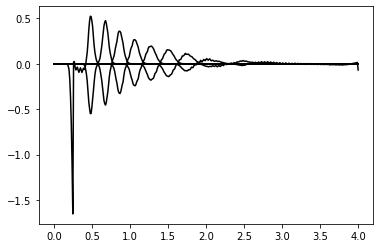

In [10]:
#difference for wide
for i in range(10):
    plt.plot(wide_lenses[:,0], wide_lenses[:,i+1] - np.interp(wide_lenses[:,0], cosmosis_wide_lenses[:,0], cosmosis_wide_lenses[:,i+1]), color="black", label="difference")


In [11]:
###
##cosmosis implementation for comparison
folder = "bins_cosmosis/pessim/"

cosmosis_pessim_lenses = np.zeros((11, 300))
cosmosis_pessim_lenses[0] = list(np.loadtxt(folder+"nz_lens/z.txt"))
for i in range(10):
    cosmosis_pessim_lenses[i+1] = np.loadtxt(folder+"nz_lens/bin_"+str(i+1)+".txt")
cosmosis_pessim_lenses = cosmosis_pessim_lenses.T

cosmosis_pessim_sources = np.zeros((11, 300))
cosmosis_pessim_sources[0] = list(np.loadtxt(folder+"nz_source/z.txt"))
for i in range(10):
    cosmosis_pessim_sources[i+1] = np.loadtxt(folder+"nz_source/bin_"+str(i+1)+".txt")
cosmosis_pessim_sources = cosmosis_pessim_sources.T
    

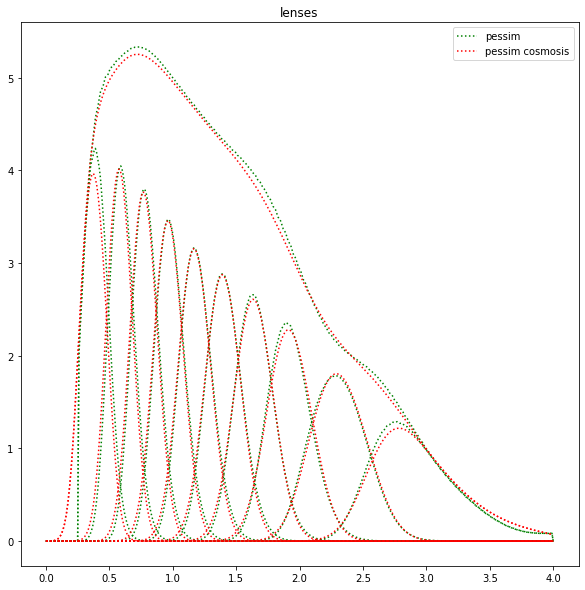

In [12]:
plt.figure(figsize=(10,10))
plt.plot(pessim_lenses[:,0],np.sum(pessim_lenses[:,1:], axis=1),":", color="green", label="pessim")
plt.plot(cosmosis_pessim_lenses[:,0],np.sum(cosmosis_pessim_lenses[:,1:], axis=1),":", color="red", label="pessim cosmosis")
plt.plot(pessim_lenses[:,0], pessim_lenses[:,1:],":", color="green", label=None)
plt.plot(cosmosis_pessim_lenses[:,0], cosmosis_pessim_lenses[:,1:],":", color="red", label=None)




plt.title("lenses")
    

plt.legend()

In [13]:
from scipy import integrate
print(integrate.trapz(np.sum(pessim_lenses[:,1:], axis=1), pessim_lenses[:,0]))
print(integrate.trapz(np.sum(cosmosis_pessim_lenses[:,1:], axis=1), cosmosis_pessim_lenses[:,0]))

9.990728242293974
10.0


In [14]:
print(integrate.trapz(pessim_lenses[:,10], pessim_lenses[:,0]))
print(integrate.trapz(cosmosis_pessim_lenses[:,10], cosmosis_pessim_lenses[:,0]))

0.9995696331215149
0.9999999999999998


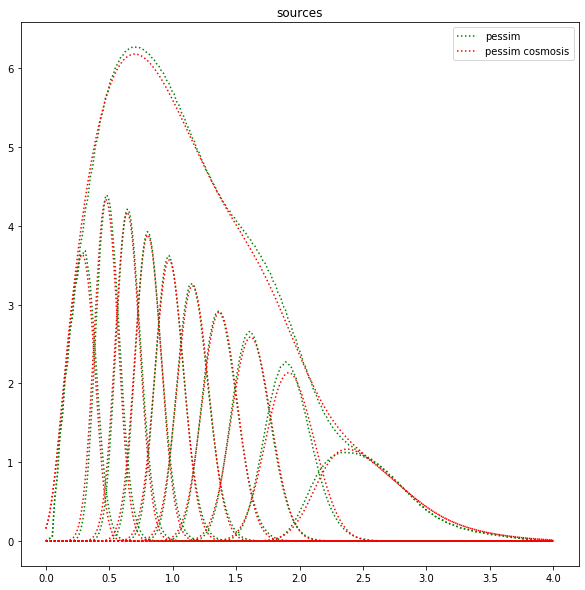

In [15]:
plt.figure(figsize=(10,10))
plt.plot(pessim_sources[:,0],np.sum(pessim_sources[:,1:], axis=1),":", color="green", label="pessim")
plt.plot(cosmosis_pessim_sources[:,0],np.sum(cosmosis_pessim_sources[:,1:], axis=1),":", color="red", label="pessim cosmosis")
plt.plot(pessim_sources[:,0], pessim_sources[:,1:],":", color="green", label=None)
plt.plot(cosmosis_pessim_sources[:,0], cosmosis_pessim_sources[:,1:],":", color="red", label=None)




plt.title("sources")
    

plt.legend()

In [16]:
from scipy import integrate
print(integrate.trapz(np.sum(pessim_sources[:,1:], axis=1), pessim_sources[:,0]))
print(integrate.trapz(np.sum(cosmosis_pessim_sources[:,1:], axis=1), cosmosis_pessim_sources[:,0]))

9.99973757800882
10.0


In [17]:
cosmosis_pessim_sources[:,0]

array([0.        , 0.01337793, 0.02675585, 0.04013378, 0.05351171,
       0.06688963, 0.08026756, 0.09364548, 0.10702341, 0.12040134,
       0.13377926, 0.14715719, 0.16053512, 0.17391304, 0.18729097,
       0.2006689 , 0.21404682, 0.22742475, 0.24080268, 0.2541806 ,
       0.26755853, 0.28093645, 0.29431438, 0.30769231, 0.32107023,
       0.33444816, 0.34782609, 0.36120401, 0.37458194, 0.38795987,
       0.40133779, 0.41471572, 0.42809365, 0.44147157, 0.4548495 ,
       0.46822742, 0.48160535, 0.49498328, 0.5083612 , 0.52173913,
       0.53511706, 0.54849498, 0.56187291, 0.57525084, 0.58862876,
       0.60200669, 0.61538462, 0.62876254, 0.64214047, 0.65551839,
       0.66889632, 0.68227425, 0.69565217, 0.7090301 , 0.72240803,
       0.73578595, 0.74916388, 0.76254181, 0.77591973, 0.78929766,
       0.80267559, 0.81605351, 0.82943144, 0.84280936, 0.85618729,
       0.86956522, 0.88294314, 0.89632107, 0.909699  , 0.92307692,
       0.93645485, 0.94983278, 0.9632107 , 0.97658863, 0.98996

In [18]:
##cosmosis implementation for comparison
folder = "bins_cosmosis/opt/"

cosmosis_opt_lenses = np.zeros((11, 300))
cosmosis_opt_lenses[0] = list(np.loadtxt(folder+"nz_lens/z.txt"))
for i in range(10):
    cosmosis_opt_lenses[i+1] = np.loadtxt(folder+"nz_lens/bin_"+str(i+1)+".txt")
cosmosis_opt_lenses = cosmosis_opt_lenses.T


cosmosis_opt_sources = np.zeros((11, 300))
cosmosis_opt_sources[0] = list(np.loadtxt(folder+"nz_source/z.txt"))
for i in range(10):
    cosmosis_opt_sources[i+1] = np.loadtxt(folder+"nz_source/bin_"+str(i+1)+".txt")
cosmosis_opt_sources = cosmosis_opt_sources.T
    

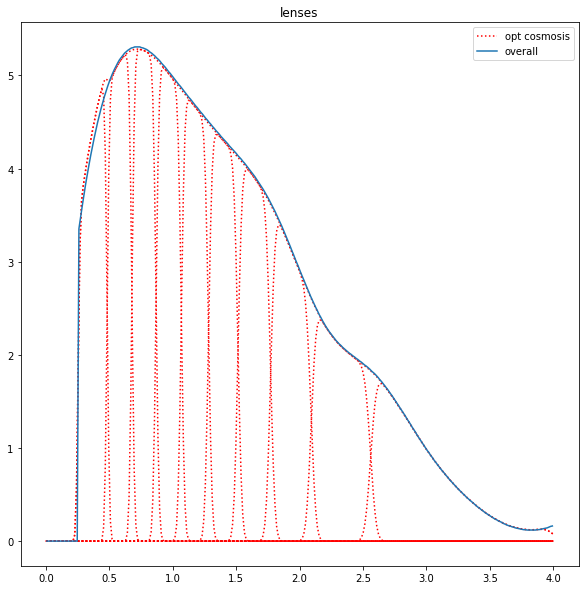

In [19]:
plt.figure(figsize=(10,10))
#plt.plot(wide_lenses[:,0],np.sum(wide_lenses[:,1:], axis=1),":", color="green", label="wide")
plt.plot(cosmosis_opt_lenses[:,0],np.sum(cosmosis_opt_lenses[:,1:], axis=1),":", color="red", label="opt cosmosis")
#plt.plot(wide_lenses[:,0], wide_lenses[:,1:],":", color="green", label=None)
plt.plot(cosmosis_opt_lenses[:,0], cosmosis_opt_lenses[:,1:],":", color="red", label=None)


overall_dist = np.copy(overall_lenses[:,3])
mask = overall_lenses[:,1]< 0.25
overall_dist[mask] = 0
norm = integrate.trapz(overall_dist , overall_lenses[:,1])
plt.plot(overall_lenses[:,1], overall_dist/norm*10, label="overall")

plt.title("lenses")
    

plt.legend()

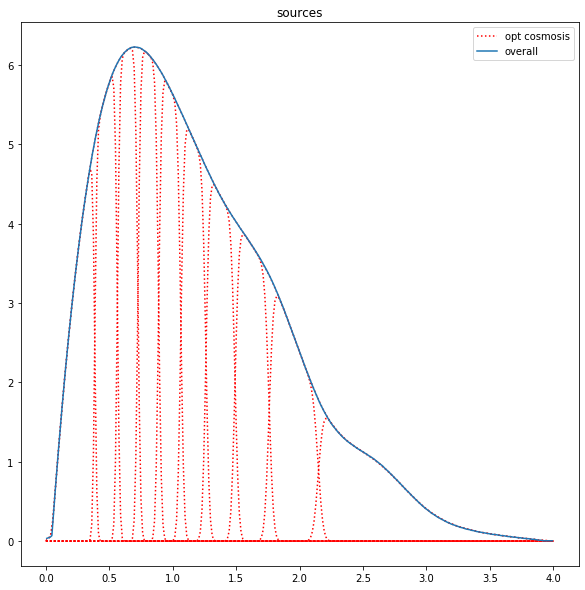

In [21]:
plt.figure(figsize=(10,10))
#plt.plot(wide_lenses[:,0],np.sum(wide_lenses[:,1:], axis=1),":", color="green", label="wide")
plt.plot(cosmosis_opt_sources[:,0],np.sum(cosmosis_opt_sources[:,1:], axis=1),":", color="red", label="opt cosmosis")
#plt.plot(wide_lenses[:,0], wide_lenses[:,1:],":", color="green", label=None)
plt.plot(cosmosis_opt_sources[:,0], cosmosis_opt_sources[:,1:],":", color="red", label=None)


overall_dist = np.copy(overall_sources[:,3])
#mask = overall_sources[:,1]< 0.25
#overall_dist[mask] = 0
norm = integrate.trapz(overall_dist , overall_sources[:,1])
plt.plot(overall_sources[:,1], overall_dist/norm*10, label="overall")

plt.title("sources")
    

plt.legend()

In [22]:
overall_lenses[:,3]

array([0.0001 , 0.00018, 0.00077, 0.00135, 0.00191, 0.00246, 0.00299,
       0.0035 , 0.004  , 0.00448, 0.00495, 0.0054 , 0.00583, 0.00625,
       0.00666, 0.00705, 0.00743, 0.00779, 0.00814, 0.00848, 0.0088 ,
       0.00911, 0.00941, 0.0097 , 0.00997, 0.01023, 0.01048, 0.01071,
       0.01094, 0.01115, 0.01136, 0.01155, 0.01173, 0.0119 , 0.01206,
       0.01221, 0.01235, 0.01248, 0.0126 , 0.01271, 0.01281, 0.0129 ,
       0.01299, 0.01307, 0.01313, 0.01319, 0.01325, 0.01329, 0.01333,
       0.01336, 0.01339, 0.0134 , 0.01342, 0.01342, 0.01342, 0.01342,
       0.0134 , 0.01339, 0.01337, 0.01335, 0.01332, 0.01328, 0.01325,
       0.01321, 0.01317, 0.01312, 0.01308, 0.01303, 0.01297, 0.01292,
       0.01287, 0.01281, 0.01275, 0.0127 , 0.01264, 0.01258, 0.01252,
       0.01246, 0.0124 , 0.01235, 0.01229, 0.01223, 0.01217, 0.01211,
       0.01205, 0.012  , 0.01194, 0.01188, 0.01182, 0.01177, 0.01171,
       0.01165, 0.0116 , 0.01154, 0.01148, 0.01143, 0.01137, 0.01132,
       0.01126, 0.01

In [23]:
np.sum(overall_lenses[:,3])


1.9780600000000002

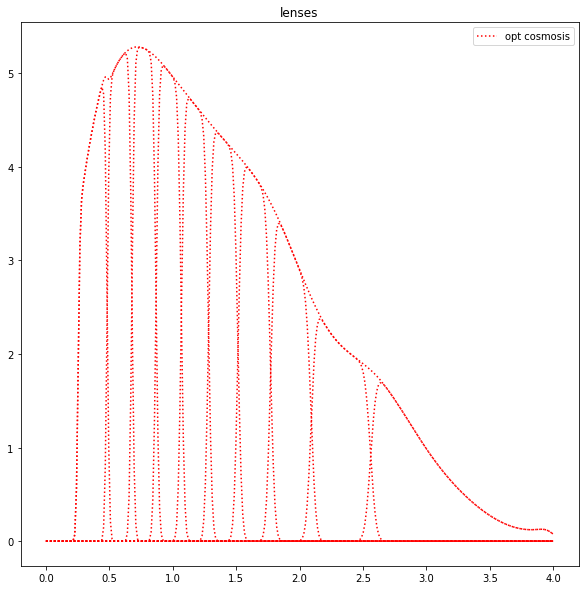

In [24]:
plt.figure(figsize=(10,10))
#plt.plot(wide_lenses[:,0],np.sum(wide_lenses[:,1:], axis=1),":", color="green", label="wide")
plt.plot(cosmosis_opt_lenses[:,0],np.sum(cosmosis_opt_lenses[:,1:], axis=1),":", color="red", label="opt cosmosis")
#plt.plot(wide_lenses[:,0], wide_lenses[:,1:],":", color="green", label=None)
plt.plot(cosmosis_opt_lenses[:,0], cosmosis_opt_lenses[:,1:],":", color="red", label=None)




plt.title("lenses")
    

plt.legend()

## making a plot of the bins

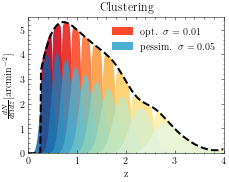

In [141]:
plt.style.use('science')
plt.figure(figsize=(3.5,2.5))
#plt.plot(wide_lenses[:,0],np.sum(wide_lenses[:,1:], axis=1),":", color="green", label="wide")
#plt.plot(cosmosis_opt_lenses[:,0],np.sum(cosmosis_opt_lenses[:,1:], axis=1),":", color="red", label="opt cosmosis")
#plt.plot(wide_lenses[:,0], wide_lenses[:,1:],":", color="green", label=None)


#plt.plot(cosmosis_opt_lenses[:,0], cosmosis_opt_lenses[:,1:], color="red", label=None)
n = 10
#color=cm.rainbow(np.linspace(0,1,n))
color = plt.get_cmap("YlOrRd_r")(np.linspace(0.1,0.9,n))
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color=color[3], label='opt. $\, \sigma = 0.01$')
for i in range(1,11):
    plt.fill_between(cosmosis_opt_lenses[:,0], cosmosis_opt_lenses[:,i], alpha = 0.9, color=color[i-1] )
    

#plt.plot(cosmosis_wide_lenses[:,0], cosmosis_wide_lenses[:,1:],"." ,color="green", label=None)
color = plt.get_cmap("plasma")(np.linspace(0.1,0.9,n))#.flip()

#for i in range(1,11):
    #plt.fill_between(cosmosis_wide_lenses[:,0], cosmosis_wide_lenses[:,i], alpha = 0.8, color=color[i-1] ) 

color = plt.get_cmap("GnBu_r")(np.linspace(0.1,0.9,n))#.flip()
blue_patch = mpatches.Patch(color=color[3], label='pessim. $\, \sigma = 0.05$')
for i in range(1,11):
    plt.fill_between(cosmosis_pessim_lenses[:,0], cosmosis_pessim_lenses[:,i], alpha = 0.8, color=color[i-1] ) 

overall_dist = np.copy(overall_lenses[:,3])
mask = overall_lenses[:,1]< 0.25
overall_dist[mask] = 0
norm = integrate.trapz(overall_dist , overall_lenses[:,1])
plt.plot(overall_lenses[:,1], overall_dist/norm*10, "--",linewidth=2,label="overall", color="black")

plt.title("Clustering")
plt.ylim(0,5.5)
plt.xlim(0,4.)

plt.xlabel("z")
plt.ylabel(r"$\frac{dN}{d\Omega dz} [\textrm{arcmin}^{-2}]$")


plt.legend(handles=[red_patch, blue_patch], loc="upper right")

#plt.legend()
plt.savefig("lenses_bins_RAW.pdf")

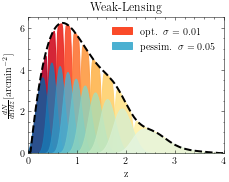

In [142]:
plt.style.use('science')
plt.figure(figsize=(3.5,2.5))
#plt.plot(wide_lenses[:,0],np.sum(wide_lenses[:,1:], axis=1),":", color="green", label="wide")
#plt.plot(cosmosis_opt_lenses[:,0],np.sum(cosmosis_opt_lenses[:,1:], axis=1),":", color="red", label="opt cosmosis")
#plt.plot(wide_lenses[:,0], wide_lenses[:,1:],":", color="green", label=None)


#plt.plot(cosmosis_opt_lenses[:,0], cosmosis_opt_lenses[:,1:], color="red", label=None)
n = 10
#color=cm.rainbow(np.linspace(0,1,n))
color = plt.get_cmap("YlOrRd_r")(np.linspace(0.1,0.9,n))
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color=color[3], label='opt. $\, \sigma = 0.01$')
for i in range(1,11):
    plt.fill_between(cosmosis_opt_sources[:,0], cosmosis_opt_sources[:,i], alpha = 0.9, color=color[i-1] )
    

#plt.plot(cosmosis_wide_lenses[:,0], cosmosis_wide_lenses[:,1:],"." ,color="green", label=None)
color = plt.get_cmap("plasma")(np.linspace(0.1,0.9,n))#.flip()

#for i in range(1,11):
    #plt.fill_between(cosmosis_wide_lenses[:,0], cosmosis_wide_lenses[:,i], alpha = 0.8, color=color[i-1] ) 

color = plt.get_cmap("GnBu_r")(np.linspace(0.1,0.9,n))#.flip()
blue_patch = mpatches.Patch(color=color[3], label='pessim. $\, \sigma = 0.05$')
for i in range(1,11):
    plt.fill_between(cosmosis_pessim_sources[:,0], cosmosis_pessim_sources[:,i], alpha = 0.8, color=color[i-1] ) 

overall_dist = np.copy(overall_sources[:,3])
#mask = overall_sources[:,1]< 0.25
#overall_dist[mask] = 0
norm = integrate.trapz(overall_dist , overall_sources[:,1])
plt.plot(overall_sources[:,1], overall_dist/norm*10, "--",linewidth=2,label="overall", color="black")

plt.title("Weak-Lensing")
plt.ylim(0,6.5)
plt.xlim(0,4.)

plt.xlabel("z")
plt.ylabel(r"$\frac{dN}{d\Omega dz} [\textrm{arcmin}^{-2}]$")


plt.legend(handles=[red_patch, blue_patch], loc="upper right")

#plt.legend()
plt.savefig("sources_bins_RAW.pdf")

In [46]:
plt.cm.Reds(0.1)

(0.9969242599000384, 0.8961937716262975, 0.8489042675893886, 1.0)

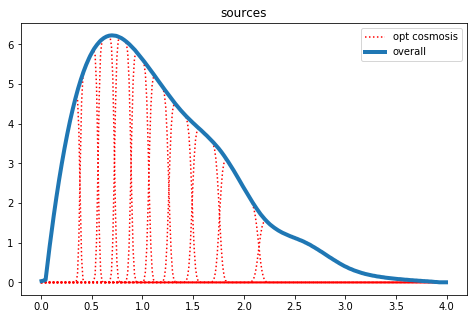

In [28]:
plt.figure(figsize=(8,5))
#plt.plot(wide_lenses[:,0],np.sum(wide_lenses[:,1:], axis=1),":", color="green", label="wide")
plt.plot(cosmosis_opt_sources[:,0],np.sum(cosmosis_opt_sources[:,1:], axis=1),":", color="red", label="opt cosmosis")
#plt.plot(wide_lenses[:,0], wide_lenses[:,1:],":", color="green", label=None)
plt.plot(cosmosis_opt_sources[:,0], cosmosis_opt_sources[:,1:],":", color="red", label=None)


overall_dist = np.copy(overall_sources[:,3])
#mask = overall_sources[:,1]< 0.25
#overall_dist[mask] = 0
norm = integrate.trapz(overall_dist , overall_sources[:,1])
plt.plot(overall_sources[:,1], overall_dist/norm*10, linewith=4,label="overall")

plt.title("sources")
    

plt.legend()